In [283]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat  
from numpy import random
lstsq = np.linalg.lstsq
norm  = np.linalg.norm

## i.) Generating Data, Levenberg-Marquardt Algorithm multiple runs implementation
Experimenting with different initial values of lambda we scaled it by 10^-5 and chose a stopping criterion of the residual being close enough to 0. 

In [341]:
def initialize(X, N):                  
    k=3                     
    X = random.randn(N,k) 
    Y=[]
    for i in range(500):
        Y.append(X[i][0]*X[i][1]+X[i][2])
    Y = np.array(Y)
    w = random.randn(16,1) 
    wk = random.randn(16,1) 
    lamb = random.randint(1, 10)
    lambdak = random.randint(1, 10)
    return lamb, lambdak, w, wk#, nn
#xbar, lamb, lambdak, w, wk = initialize(X)
def neural_net(X, w):
    #nn = w[0]*np.tanh(w[1]*X[0]+w[2]*X[1]+w[3]*X[2]+w[4]) + w[5]*np.tanh(w[6]*X[0]+w[7]*X[1]+w[8]*X[2]+w[9]) + w[10]*np.tanh(w[11]*X[0]+w[12]*X[1]+w[13]*X[2]+w[14])+w[15]
    stacked_nn = []
    r=[]
    for i in range(500):
        entry = w[0]*np.tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4]) + w[5]*np.tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]) + w[10]*np.tanh(w[11]*X[i][0]+w[12]*X[i][1]+w[13]*X[i][2]+w[14])+w[15]
        stacked_nn.append(entry) #array of 500 elements each is a np array of 3
        r.append(entry - y[i])
    r = np.vstack(r)
    r = r.reshape(500,1)
    stacked_nn = np.vstack(stacked_nn)
    stacked_nn = stacked_nn.reshape(500,1) 
    return stacked_nn, r # 500x3

def jacobian(X, w):
    dw1f = []
    dw2f = []
    dw3f = []
    dw4f = []
    dw5f = []
    dw6f = []
    dw7f = []
    dw8f = []
    dw9f = []
    dw10f = []
    dw11f = []
    dw12f = []
    dw13f = []
    dw14f = []
    dw15f = []
    dw16f = []
    Dfw = []
    for i in range(500):
        dw1f.append(np.tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4])) 
        dw2f.append(w[0]*X[i][0]*deriv_tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4]))
        dw3f.append(w[0]*X[i][1]*deriv_tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4]))
        dw4f.append(w[0]*X[i][2]*deriv_tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4]))
        dw5f.append(w[0]*deriv_tanh(w[1]*X[i][0]+w[2]*X[i][1]+w[3]*X[i][2]+w[4]))
        dw6f.append(np.tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw7f.append(w[5]*X[i][0]*deriv_tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw8f.append(w[5]*X[i][1]*deriv_tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw9f.append(w[5]*X[i][2]*deriv_tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw10f.append(w[5]*deriv_tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw11f.append(np.tanh(w[6]*X[i][0]+w[7]*X[i][1]+w[8]*X[i][2]+w[9]))
        dw12f.append(w[10]*X[i][0]*deriv_tanh(w[11]*X[i][0]+w[12]*X[i][1]+w[13]*X[i][2]+w[14]))
        dw13f.append(w[10]*X[i][1]*deriv_tanh(w[11]*X[i][0]+w[12]*X[i][1]+w[13]*X[i][2]+w[14]))
        dw14f.append(w[10]*X[i][2]*deriv_tanh(w[11]*X[i][0]+w[12]*X[i][1]+w[13]*X[i][2]+w[14]))
        dw15f.append(w[11]*deriv_tanh(w[11]*X[i][0]+w[12]*X[i][1]+w[13]*X[i][2]+w[14]))
        dw16f.append(np.array([1]))
    Dfw.append(np.array(dw1f))
    Dfw.append(np.array(dw2f))
    Dfw.append(np.array(dw3f))
    Dfw.append(np.array(dw4f))
    Dfw.append(np.array(dw5f))
    Dfw.append(np.array(dw6f))
    Dfw.append(np.array(dw7f))
    Dfw.append(np.array(dw8f))
    Dfw.append(np.array(dw9f))
    Dfw.append(np.array(dw10f))
    Dfw.append(np.array(dw11f))
    Dfw.append(np.array(dw12f))
    Dfw.append(np.array(dw13f))
    Dfw.append(np.array(dw14f))
    Dfw.append(np.array(dw15f))
    Dfw.append(np.array(dw16f))
    #At this point array of 16 elements, each element is a 500x1 np array
    
    #print(len(dw15f))
    #print(len(dw16f))
    Dfw = np.vstack(Dfw)
    Dfw = Dfw.reshape(500,16)
    return Dfw #jacobian: 500X16 

def question3b(Dfw, fw):
    gradR = 2*np.dot(np.transpose(Dfw),fw)
    return gradR

def MOLS(Dfw, X, w, wk, lamb, lambdak): #Solves for 1 iteration given intial lambda and w
    A1 = jacobian(X, wk)
    b1 = np.dot(jacobian(X, wk),w) - (neural_net(X, wk)[1])
    A2 = np.identity(16)
    b2 = np.zeros((16,1))
    A3 = np.identity(16)
    b3 = wk
    
    A = []
    b = []
    
    A.append(A1*np.sqrt(lamb))
    A.append(A2*np.sqrt(lambdak))
    A.append(A3)
    A = np.vstack(A)
    b.append(b1)
    b.append(np.sqrt(lamb)*b2)
    b.append(np.sqrt(lambdak)*b3)
    b = np.vstack(b) # A, b are stacked matrices
    
    weights = lstsq(A, b, rcond=None)[0]
    return weights

def iterate(X, w, wk, lamb, lambdak):
    lamb, lambdak, w, wk = initialize(X, N)
    Dfw = jacobian(X, wk)
    nn, r = neural_net(X,w)
    gradR = 2*np.dot(np.transpose(Dfw),r)
    w = MOLS(Dfw, X, w, wk, lamb, lambdak)
    iterations = 20
    store_w=[]
    iterationaxis=[]
    raxis = []
    for i in range(iterations):
        oldr = r
        Dfw = jacobian(X, w)
        nn, r = neural_net(X,w)
        
        iterationaxis.append(i)
        raxis.append(norm(r))
        if(norm(r)**2 <0.0001 or norm(gradR) <0.0001):
            break
        elif(norm(r)**2 < norm(oldr)**2):
            lambdak=0.8*lambdak
            w = MOLS(Dfw, X, w, wk, lamb, lambdak)
            store_w.append(w)
        else:
            lambdak = 2*lambdak
            #store_w.append(w)
    iterationaxis=np.array(iterationaxis)
    raxis = np.array(raxis)    
    return store_w, iterationaxis, raxis

def main(N):
    lamb, lambdak, w, wk = initialize(X, N)
    result, x, y= iterate(X, w, wk, lamb, lambdak)
    fig,ax = plt.subplots(1)
    ax.plot(x,y)
    return result
        
    
def deriv_tanh(x):
    return 1.0 - np.tanh(x)**2

## Testing the code
Implementing mulyiple runs instead of a warm start, ran main to test the code, We can see a list of generated weights with the length of the list being iterations in which the condition that the norm got smaller was satisfied. This is because the only runs that are stored are satisfy this condition. 

2
(16, 1)


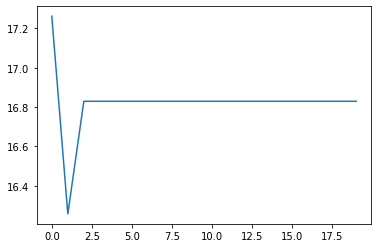

In [342]:
a = main(500)
#print(a)
print(len(a))
print(a[0].shape)

## plotting value of training loss versus iterations
fig,ax = plt.subplots(1)
ax.plot(iterationaxis,raxis)

## ii.) Testing model on another set of generated points
Running main again reinitializes initial set of generated points

In [ ]:
a = main(50)
b = main(100)
b = main(300)
print(len(a))
print(a[0].shape)

In [ ]:
 w = MOLS(Dfw, X, w, wk, 4, 9)

print(A.shape)
print(b.shape)
print(w)

## Training Data